# **Stock Price Predictor (Short Term)**

**Install dependencies:**

```bash
%pip install yfinance scikit-learn matplotlib pandas

**Importing Libraries**

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


**Fetching Historical Stock Data**

In [26]:
# Select the stock symbol
ticker = 'AAPL'

# Download last 2 years of daily data
data = yf.download(ticker, period="2y", interval="1d", auto_adjust=True)

# Preview
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-06-28  187.373962  188.017513  185.740325  186.067040  51216800
2023-06-29  187.710571  188.185824  187.067021  187.205632  46347300
2023-06-30  192.047165  192.552104  189.364023  189.730365  85069600
2023-07-03  190.552155  191.958076  189.859082  191.859062  31458200
2023-07-05  189.433334  191.066972  188.730366  189.670961  46920300


**Preparing the Features**

We’ll predict next day’s closing price based on today’s features:

- Open

- High

- Low

- Volume

also shifting the target

In [27]:
# Add next day's Close as the target
data['Next_Close'] = data['Close'].shift(-1)

# Drop the last row (which has NaN target)
data = data[:-1]

# Features
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next_Close']


**Train-Test Split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

**Training a Regression Model** (Random Forest)

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**Make Predictions**

In [30]:
predictions = model.predict(X_test)

**Actual vs Predicted Plot**

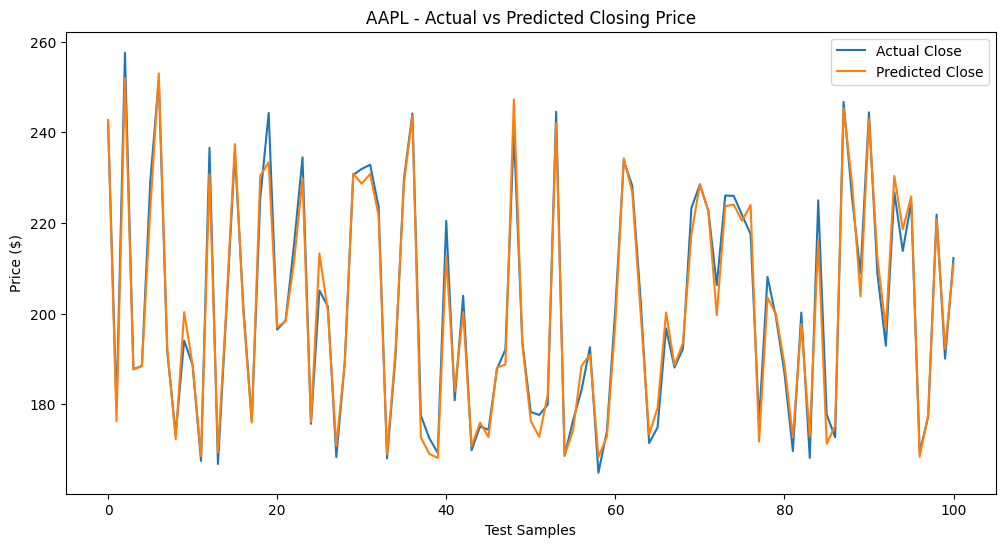

In [31]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close")
plt.plot(predictions, label="Predicted Close")
plt.title(f"{ticker} - Actual vs Predicted Closing Price")
plt.xlabel("Test Samples")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


**MSE Error**

In [32]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 12.02
